In [10]:
from pycbc import distributions
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt
import numpy as np
import pylab
from tqdm.notebook import tqdm
from gwpy.timeseries import TimeSeries
import pandas as pd
import os
import csv
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries

In [20]:
bbh_events = ['GW150914',
              'GW151012',
              'GW151226',
              'GW170104',
              'GW170608',
              'GW170729',
              'GW170809',
              'GW170814',
              'GW170818',
              'GW170823',
              'GW190408_181802',
              'GW190412',
              'GW190413_052954',
              'GW190413_134308',
              'GW190421_213856',
              'GW190424_180648',
              'GW190425',
              'GW190503_185404',
              'GW190512_180714',
              'GW190513_205428',
              'GW190514_065416',
              'GW190517_055101',
              'GW190519_153544',
              'GW190521',
              'GW190521_074359',
              'GW190527_092055',
              'GW190602_175927',
              'GW190620_030421',
              'GW190630_185205',
              'GW190701_203306',
              'GW190706_222641',
              'GW190707_093326',
              'GW190708_232457',
              'GW190719_215514',
              'GW190720_000836',
              'GW190727_060333',
              'GW190728_064510',
              'GW190731_140936',
              'GW190803_022701',
              'GW190814',
              'GW190828_063405',
              'GW190828_065509',
              'GW190909_114149',
              'GW190910_112807',
              'GW190915_235702',
              'GW190924_021846',
              'GW190929_012149',
              'GW190930_133541']

In [26]:
for i in tqdm(range(len(bbh_events))):

    gps = event_gps(bbh_events[i])
    start = int(gps) - 2
    end = int(gps) + 2

    data = TimeSeries.fetch_open_data('L1', start, end)
    data.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/"+bbh_events[i]+".txt")    

  0%|          | 0/33 [00:00<?, ?it/s]

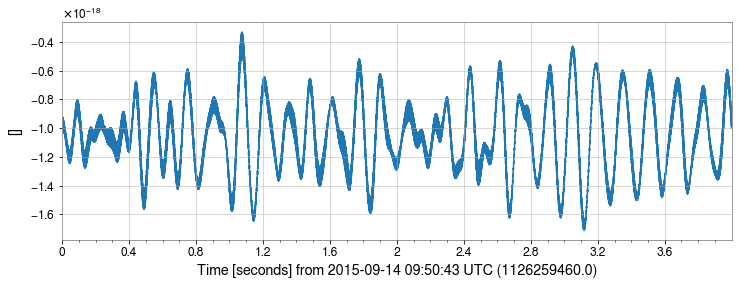

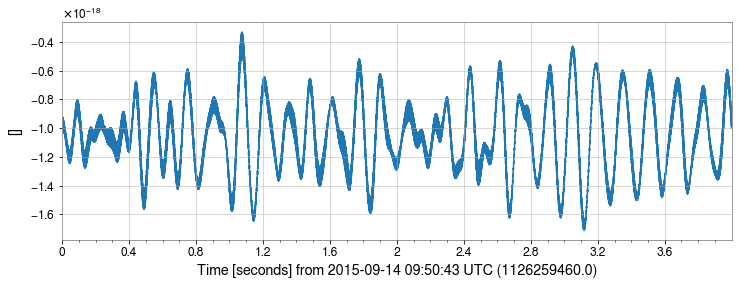

In [25]:
gps = event_gps("GW150914")
start = int(gps) - 2
end = int(gps) + 2
data = TimeSeries.fetch_open_data('L1', start, end)
data.plot()

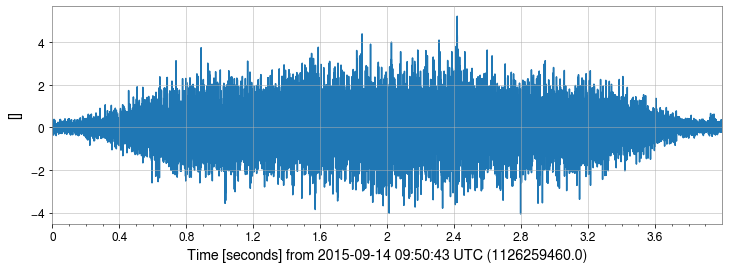

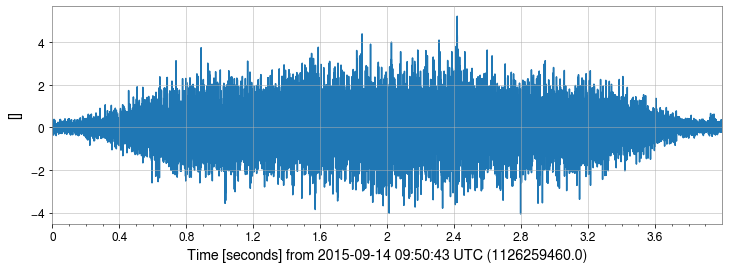

In [9]:
white = data.whiten()
white.plot()

In [ ]:
# for i in tqdm(range(len(bbh_events))):

#     gps = event_gps(bbh_events[i])
#     start = int(gps) - 2
#     end = int(gps) + 2

#     data = TimeSeries.fetch_open_data('L1', start, end)
#     data = data.whiten()
#     data.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/BBH mergers/"+bbh_events[i]+".txt")    